In [1]:
import json
import requests

$ \Large Step1:$ Gathering the data

In the following cell I access desktop and mobile traffic data from December 2007 through July 2016 (Legacy Pagecounts API) and desktop, mobile web, and mobile app traffic data from July 2015 through last month (Pageviews API)

In [2]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews_aggregate = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

The following code chunk set the parameters that needs to be extracted from legacy and page count APIs. Desktop and mobile traffic data from December 2007 through July 2016 (Legacy Pagecounts API) and desktop, mobile web, and mobile app traffic data from July 2015 through last month. However, I set the date for all the parameters from December 2007 to September 2020 so if the data is not available for a certain date it won't be returned.

In [3]:
#monthly access from desktop_site trhough legacy
legacy_desktop_site_params = {"project" : "en.wikipedia.org",
                              "access-site" : "desktop-site",
                              "granularity" : "monthly",
                              "start" : "2007120100",
                              "end" : "2016080100"
                             }
#monthly access from mobile-site through legacy
legacy_mobile_site_params = {"project" : "en.wikipedia.org",
                             "access-site" : "mobile-site",
                             "granularity" : "monthly",
                             "start" : "2007120100",
                             "end" : "2016080100"
                            }

#monthly access from desktop through pagecounts
pagecounts_desktop_params = {"project" : "en.wikipedia.org",
                             "access" : "desktop",
                             "agent" : "user",
                             "granularity" : "monthly",
                             "start" : "2007120100",
                             "end" : '2020090100'
                            }
#monthly access from mobile app through pagecounts
pagecounts_mobile_app_params = {"project" : "en.wikipedia.org",
                                "access" : "mobile-app",
                                "agent" : "user",
                                "granularity" : "monthly",
                                "start" : "2007120100",
                                "end" : '2020090100'
                               }
#monthly access from mobile-web app through pagecounts
pagecounts_mobile_web_params = {"project" : "en.wikipedia.org",
                                "access" : "mobile-web",
                                "agent" : "user",
                                "granularity" : "monthly",
                                "start" : "2007120100",
                                "end" : '2020090100'
                               }

# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/yourusername',
    'From': 'youremail@uw.edu'
}

The following function (api_call) takes two parameters. The first parameter gets the API and the second paramer gets the parameter that were designed to be extracted.

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

The following code call "api_call" function to extract the data from legacy and mobile site

In [5]:
# Legacy data
legacy_desktop_site = api_call(endpoint_legacy, legacy_desktop_site_params)
legacy_mobile_site  = api_call(endpoint_legacy, legacy_mobile_site_params)

# Pageview data
pageview_desktop    = api_call(endpoint_pageviews_aggregate, pagecounts_desktop_params)
pageview_mobile_app = api_call(endpoint_pageviews_aggregate, pagecounts_mobile_app_params)
pageview_mobile_web = api_call(endpoint_pageviews_aggregate, pagecounts_mobile_web_params)

5 json file will be written based on the calls in the previous cell.

In [6]:
# Write data to files
f = open("/Users/sdibay/Desktop/Data Science/Human_Centered/pagecounts_desktop-site_200712-201608.json", "w")
f.write(json.dumps(legacy_desktop_site, indent=4))
f.close()

f = open("/Users/sdibay/Desktop/Data Science/Human_Centered/pagecounts_mobile-site-200712-201608.json", "w")
f.write(json.dumps(legacy_mobile_site, indent=4))
f.close()

f = open("/Users/sdibay/Desktop/Data Science/Human_Centered/pageviews_desktop_200712-202008.json", "w")
f.write(json.dumps(pageview_desktop, indent=4))
f.close()

f = open("/Users/sdibay/Desktop/Data Science/Human_Centered/pageviews_mobile-app_200712-202008.json", "w")
f.write(json.dumps(pageview_mobile_app, indent=4))
f.close()


f = open("/Users/sdibay/Desktop/Data Science/Human_Centered/pageviews_mobile-web_200712-202008.json", "w")
f.write(json.dumps(pageview_mobile_web, indent=4))
f.close()


$ \Large Step 2:$ Processing the data

The following function (export_to_csv) is written to convert the json files to CSV files

In [7]:
import csv  

def export_to_csv(json, filename, input_count_key_name, output_count_key_name):
    # field names  
    headers = ['year', 'month', output_count_key_name]

    # writing to csv file  
    with open(filename, 'w') as csvfile:  
        # creating a csv writer object  
        csvwriter = csv.writer(csvfile)  
        
        # write the headers  
        csvwriter.writerow(headers)
    
        # write the data rows
        for item in json['items']:
            year  = item['timestamp'][0:4]
            month = item['timestamp'][4:6]
            count = item[input_count_key_name]
            csvwriter.writerow([year,month,count])

By calling export_to_csv for 5 times, 5 CVS files will be created.

In [8]:
export_to_csv(legacy_desktop_site, "/Users/sdibay/Desktop/Data Science/Human_Centered/legacy_desktop_site.csv","count","pagecount_desktop_views")
export_to_csv(legacy_mobile_site, "/Users/sdibay/Desktop/Data Science/Human_Centered/legacy_mobile_site.csv","count","pagecount_mobile_views")
export_to_csv(pageview_desktop, "/Users/sdibay/Desktop/Data Science/Human_Centered/pageview_desktop.csv","views","pageview_desktop_views")
export_to_csv(pageview_mobile_app, "/Users/sdibay/Desktop/Data Science/Human_Centered/pageview_mobile_app.csv","views","pageview_mobile_app_views")
export_to_csv(pageview_mobile_web, "/Users/sdibay/Desktop/Data Science/Human_Centered/pageview_mobile_web.csv","views","pageview_mobile_web_views")

The following code are to read each CVS files I created in the previous cell.

In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('legacy_desktop_site.csv')
dc = pd.read_csv('legacy_mobile_site.csv')
dg = pd.read_csv('pageview_desktop.csv')
dj = pd.read_csv('pageview_mobile_app.csv')
dh = pd.read_csv('pageview_mobile_web.csv')

I am combining all 5 CSV files in the following code chunk and call

In [10]:
res = df.merge(dc, on=['year','month'], how='outer')
res_two = res.merge(dg, on=['year','month'], how='outer')
res_three = res_two.merge(dj, on=['year','month'], how='outer')
res_four = res_three.merge(dh,on=['year','month'], how='outer')
res_four.to_csv("en-wikipedia_traffic_200712-202009.csv", index=False)

Reading the one excel file I created from combining 5 excel files. Aslo I am showing headers.

In [11]:
a = pd.read_csv("/Users/sdibay/Desktop/Data Science/Human_Centered/en-wikipedia_traffic_200712-202009.csv")
data_top = a.head()
data_top

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_app_views,pageview_mobile_web_views
0,2007,12,2.998332e+09,NaN,NaN,NaN,NaN
1,2008,1,4.930903e+09,NaN,NaN,NaN,NaN
2,2008,2,4.818394e+09,NaN,NaN,NaN,NaN
3,2008,3,4.955406e+09,NaN,NaN,NaN,NaN
4,2008,4,5.159162e+09,NaN,NaN,NaN,NaN


In [12]:
a = a.replace(np.nan, 0)
data_top = a.head()
data_top

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageview_desktop_views,pageview_mobile_app_views,pageview_mobile_web_views
0,2007,12,2.998332e+09,0.0,0.0,0.0,0.0
1,2008,1,4.930903e+09,0.0,0.0,0.0,0.0
2,2008,2,4.818394e+09,0.0,0.0,0.0,0.0
3,2008,3,4.955406e+09,0.0,0.0,0.0,0.0
4,2008,4,5.159162e+09,0.0,0.0,0.0,0.0


1- combining pageview_mobile_app_views and pageview_mobile_web_views to create "pageview_mobile_views" column
2- combining pagecount_desktop_views and pagecount_mobile_views to create "pagecount_all_views"
3- combining pageview_mobile_views and pageview_desktop_views to create "pageview_all_views"

In [13]:
#1 pageview_mobile_views 
pageview_mobile_views = a["pageview_mobile_app_views"] + a["pageview_mobile_web_views"]
a["pageview_mobile_views"] = pageview_mobile_views

#2 pagecount_all_views
pagecount_all_views =a["pagecount_desktop_views"]+ a["pagecount_mobile_views"]
a["pagecount_all_views"] = pagecount_all_views

pageview_all_views = a["pageview_mobile_views"]+a["pageview_desktop_views"]
a["pageview_all_views"]= pageview_all_views 

#replacing all the NAs with zero to cover NAs in three new variables
a = a.replace(np.nan, 0)


Dropping pageview_mobile_web_views and pageview_mobile_app_views columns

In [14]:
a = a.drop(["pageview_mobile_web_views", "pageview_mobile_app_views"], axis = 1) 

Creating final single CSV document with the following variables:
year, month, pagecount_desktop_views, pagecount_mobile_views,pageview_mobile_app_views,

In [15]:
a.to_csv("en-wikipedia_traffic_200712-202009.csv", index=False)

$ \Large Step 3:$ Analyze the data

Plotting the variables for all the years from December 2007 to September 2020

In [16]:
import matplotlib.pyplot as plt

In [17]:
# b = (a.set_index(a.year.astype(str)+"-"+a.month.astype(str).str.zfill(2))
#       .drop(['month','year'],axis=1))

In [18]:
a = a.set_index(['year', 'month'])
a.sort_index(inplace=True)

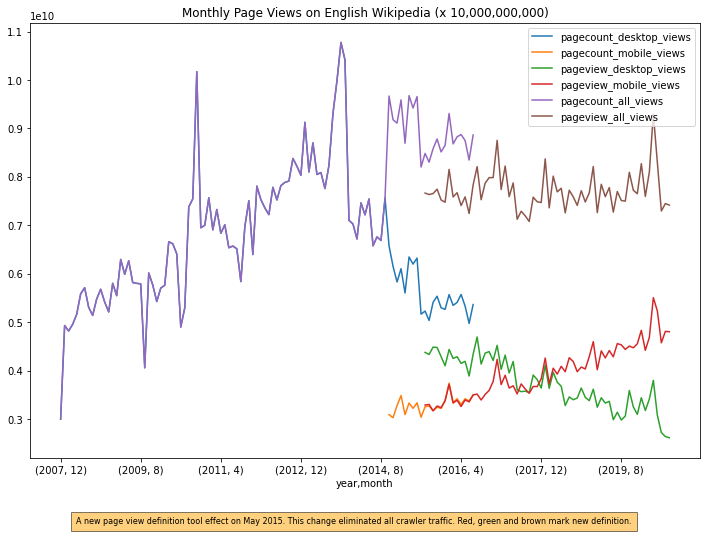

In [19]:
a = a.replace({0:np.nan})
a.plot(kind='line', figsize=(12,8), title="Monthly Page Views on English Wikipedia (x 10,000,000,000)")

plt.figtext(0.5, 0.01, "A new page view definition tool effect on May 2015. This change eliminated all crawler traffic. Red, green and brown mark new definition.", ha="center", fontsize=8, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
img = plt.gcf()

Saving the image

In [20]:
img.savefig('EN_Wikepedia_Views.png', dpi=300,quality=90)